In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
# matplotlib 한글 깨짐 현상 관련 처리
plt.rcParams["font.family"]="Malgun Gothic"
plt.rcParams["axes.unicode_minus"]=False

In [109]:
file_path = "./data/company_nps_data.csv"

df = pd.read_csv(file_path, encoding="cp949")  # 한글 관련 오류로 인코딩 설정
df

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151
...,...,...,...,...,...,...
99796,171439,4630622,2017,2,2402740,11
99797,239388,1045021,2018,10,1428800,9
99798,272304,181898,2018,3,392560,4
99799,362194,2100218,2018,12,874780,3


In [110]:
df.shape

(99801, 6)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99801 entries, 0 to 99800
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   회사ID      99801 non-null  int64
 1   연매출액      99801 non-null  int64
 2   년도        99801 non-null  int64
 3   월         99801 non-null  int64
 4   월별_연금보험료  99801 non-null  int64
 5   월별_직원수    99801 non-null  int64
dtypes: int64(6)
memory usage: 4.6 MB


# Column별 검토

### 1. 회사ID

    => 회사에 부여된 고유한 ID값으로, 숫자의 크고 작음은 크게 의미없는 것으로 판단됨

In [112]:
회사ID_list = df.회사ID.unique()
print(회사ID_list)
len(회사ID_list)  # 회사ID 고유한 값 개수 확인 => 5000개 회사

[233757 123464 342124 ... 547774 413938  96128]


5000

In [113]:
회사ID_list = np.sort(회사ID_list)  # 오름차순 정렬
회사ID_list

array([     63,      95,     102, ..., 2693684, 3312354, 5159723],
      dtype=int64)

In [114]:
회사ID_list[:50]  # 회사ID 초반 내역 확인

array([   63,    95,   102,   295,   414,   597,   786,   917,  1052,
        1125,  1715,  1807,  2031,  2037,  2360,  2483,  2745,  2807,
        2842,  2993,  3611,  3828,  4234,  4534,  4926,  5202,  5452,
        5711,  6184,  6438,  7046,  7153,  8208,  8268,  8496,  8835,
        9061,  9613,  9734,  9862, 10348, 10564, 10881, 10929, 11393,
       12022, 12272, 12767, 13481, 13827], dtype=int64)

In [115]:
회사ID_list[4950:]  # 회사ID 후반 내역 확인

array([ 586026,  589218,  589964,  590442,  590500,  590763,  591540,
        594485,  596878,  596960,  597632,  597726,  598218,  599171,
        602137,  604914,  613233,  613313,  613430,  613668,  615532,
        615554,  617524,  617791,  620445,  630190,  635082,  691111,
        742694,  756518,  782086,  789269,  794223,  839180,  851154,
        900163,  918661,  933076,  990805, 1021039, 1065828, 1949405,
       1983879, 2256869, 2329349, 2400284, 2437574, 2693684, 3312354,
       5159723], dtype=int64)

### 2. 연매출액
* 연단위 data로, 해당연도 월별 동일한 금액 입력된 것 확인

    => 회사ID 기준 그룹핑 후 추가 검토 진행 예정

In [116]:
r = df.sort_values("회사ID")
r.head(20)  # 동일한 회사의 연매출액 입력방식 파악 => 해당연도 월별 동일한 금액 입력됨

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
79358,63,11328779396,2018,9,416186660,999
74251,63,11328779396,2018,2,406770960,1018
23302,63,11328779396,2018,7,418169080,1009
80947,63,11328779396,2018,3,404826240,1013
98243,63,11328779396,2018,11,414081820,995
33039,63,11328779396,2018,1,403119840,1006
6449,63,11328779396,2018,6,401083100,1011
80770,63,11328779396,2018,4,404211800,1012
52606,63,11328779396,2018,8,418292620,1011
53569,63,11328779396,2018,12,419953960,1014


### 3. 년도
* 전체 data상 연도 범위 확인 완료 => 2015년 ~ 2019년

In [117]:
df.년도.unique()  # data상 연도 범위 확인

array([2018, 2015, 2016, 2017, 2019], dtype=int64)

### 4. 월
* 전체 data상 월단위 범위 확인 완료 => 2015년 11월 ~ 2019년 12월

In [118]:
# 연도별 월단위 범위 확인
for key, value in df.groupby("년도")["월"]:
    value = value.unique()  # 중복값 제외
    value = np.sort(value)  # 오름차순 정렬
    print(key, value)

2015 [11 12]
2016 [ 1  2  3  4  5  6  7  8  9 10 11 12]
2017 [ 1  2  3  4  5  6  7  8  9 10 11 12]
2018 [ 1  2  3  4  5  6  7  8  9 10 11 12]
2019 [ 1  2  3  4  5  6  7  8  9 10 11 12]


### 5. 월별_연금보험료
* 연금보험료 관련 개념
 - 총액 = 기준소득월액 * 9%(연금보험률)
 - 기준소득월액은 최저 33만원에서 최고 524만원까지의 범위로 결정됨(2021.7.1 ~ 2022.6.30 기준)
 - 참조 사이트
     * https://www.nps.or.kr/jsppage/business/insure_cal.jsp - 총액 산출기준
     * https://www.npsonair.kr/basic3/2223 - 기준소득월액 기준
 
  => 회사별로 직원 급여 수준에 따라 정해지는 금액으로, 회사ID 기준 그룹핑 후 추가 검토 예정

### 6. 월별_직원수
* 회사별 해당월의 직원수 정보로, 회사ID 기준 그룹핑 후 추가 검토 예정

# Column별 검토 결과
1) 회사별 직원 평균급여의 상대적 추이를 확인할 수 있는 지표로 "인당_연금보험료(평균)"를 추가해 활용하고자 함
 - 산출 방법 : "월별_연금보험료" / "월별_직원수"
 - 데이터프레임상 "인당_연금보험료(평균)" 신규 Column 추가

2) 주요 지표에 대한 각 회사별 추이를 다각도로 분석 예정
 - 주요 지표(안) : "연매출액", "직원수", "인당_연금보험료(평균)"

# 신규 Column 추가 : "인당_연금보험료(평균)"

### "인당_연금보험료(평균)" 계산 및 Column 추가 후 int로 형변환(1차 시도)

In [119]:
# 계산 및 Colomn 추가 완료 후, int로 형변환 시 오류 발생함에 따라 확인 진행 => 13개의 null값이 있는 것을 확인함
df_v2 = df
df_v2["인당_연금보험료(평균)"] = df_v2["월별_연금보험료"] / df_v2["월별_직원수"]
#df_v2["인당_연금보험료(평균)"] = df_v2["인당_연금보험료(평균)"].apply(lambda x : int(x))  # 실행 시 오류 발생함
df_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99801 entries, 0 to 99800
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   회사ID          99801 non-null  int64  
 1   연매출액          99801 non-null  int64  
 2   년도            99801 non-null  int64  
 3   월             99801 non-null  int64  
 4   월별_연금보험료      99801 non-null  int64  
 5   월별_직원수        99801 non-null  int64  
 6   인당_연금보험료(평균)  99788 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 5.3 MB


In [120]:
# 세부내역 확인 과정에서 데이터프레임 값 출력 시, 과학적표기법(Scientific notation)으로 출력되는 경우가 있어 셋팅 변경
pd.set_option("display.float_format", "{:.1f}".format)  # 항상 float 형식으로 출력되도록 설정

### ※ [Check!] Pandas에서 float 출력 포맷 설정 방법
* "pd.set_option()"으로 설정 가능(아래는 5자리 기준 예시)
    - pd.set_option("display.float_format", "{:.5f}".format)  # 항상 float형식으로 출력
    - pd.set_option("display.float_format", "{:.5e}".format)  # 항상 과학적표기법으로 출력
    - pd.set_option("display.float_format", "{:.5g}".format)  # 숫자값의 크기에 따라 f나 e로 출력
    - pd.set_option("display.float_format", None)  # 지정한 표기법 설정을 해제함
* 참조 : "pandas 출력 포맷팅"(https://financedata.github.io/posts/pandas-display-format.html)

In [121]:
# "인당_연금보험료(평균)" 값이 null인 13개 데이터 세부내역 확인 => "월별_직원수"가 0인 것을 확인함
count = 0
for i, v in enumerate(df_v2["인당_연금보험료(평균)"].isna()):
    if v == True:
        print(df_v2.loc[i])
        count += 1
print(f"총 {count}개")

회사ID           478999.0
연매출액           394790.0
년도               2016.0
월                   3.0
월별_연금보험료            0.0
월별_직원수              0.0
인당_연금보험료(평균)        NaN
Name: 4450, dtype: float64
회사ID           568445.0
연매출액           740245.0
년도               2018.0
월                  10.0
월별_연금보험료            0.0
월별_직원수              0.0
인당_연금보험료(평균)        NaN
Name: 6162, dtype: float64
회사ID            288014.0
연매출액           3709457.0
년도                2016.0
월                   11.0
월별_연금보험료             0.0
월별_직원수               0.0
인당_연금보험료(평균)         NaN
Name: 7251, dtype: float64
회사ID           568445.0
연매출액           740245.0
년도               2018.0
월                   8.0
월별_연금보험료            0.0
월별_직원수              0.0
인당_연금보험료(평균)        NaN
Name: 12176, dtype: float64
회사ID           550603.0
연매출액           416881.0
년도               2018.0
월                   1.0
월별_연금보험료            0.0
월별_직원수              0.0
인당_연금보험료(평균)        NaN
Name: 20070, dtype: float64
회사ID           4

### "인당_연금보험료(평균)" Column 값 int로 형변환(2차 시도)

In [122]:
# "인당_연금보험료(평균)"이 NaN인 경우 0으로 대체
for i, v in enumerate(df_v2["인당_연금보험료(평균)"].isna()):
    if v == True:
        df_v2.loc[i, "인당_연금보험료(평균)"] = 0
        print(df_v2.loc[i])

회사ID           478999.0
연매출액           394790.0
년도               2016.0
월                   3.0
월별_연금보험료            0.0
월별_직원수              0.0
인당_연금보험료(평균)        0.0
Name: 4450, dtype: float64
회사ID           568445.0
연매출액           740245.0
년도               2018.0
월                  10.0
월별_연금보험료            0.0
월별_직원수              0.0
인당_연금보험료(평균)        0.0
Name: 6162, dtype: float64
회사ID            288014.0
연매출액           3709457.0
년도                2016.0
월                   11.0
월별_연금보험료             0.0
월별_직원수               0.0
인당_연금보험료(평균)         0.0
Name: 7251, dtype: float64
회사ID           568445.0
연매출액           740245.0
년도               2018.0
월                   8.0
월별_연금보험료            0.0
월별_직원수              0.0
인당_연금보험료(평균)        0.0
Name: 12176, dtype: float64
회사ID           550603.0
연매출액           416881.0
년도               2018.0
월                   1.0
월별_연금보험료            0.0
월별_직원수              0.0
인당_연금보험료(평균)        0.0
Name: 20070, dtype: float64
회사ID           4

In [123]:
df_v2.info()  # null값이 없어진 것을 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99801 entries, 0 to 99800
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   회사ID          99801 non-null  int64  
 1   연매출액          99801 non-null  int64  
 2   년도            99801 non-null  int64  
 3   월             99801 non-null  int64  
 4   월별_연금보험료      99801 non-null  int64  
 5   월별_직원수        99801 non-null  int64  
 6   인당_연금보험료(평균)  99801 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 5.3 MB


In [124]:
# int로 형변환 1차 시도 시 오류가 발생했던 코드 다시 실행 => 정상 실행 완료
df_v2["인당_연금보험료(평균)"] = df_v2["인당_연금보험료(평균)"].apply(lambda x : int(x))

In [125]:
df_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99801 entries, 0 to 99800
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   회사ID          99801 non-null  int64
 1   연매출액          99801 non-null  int64
 2   년도            99801 non-null  int64
 3   월             99801 non-null  int64
 4   월별_연금보험료      99801 non-null  int64
 5   월별_직원수        99801 non-null  int64
 6   인당_연금보험료(평균)  99801 non-null  int64
dtypes: int64(7)
memory usage: 5.3 MB


In [126]:
df_v2

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,인당_연금보험료(평균)
0,233757,41688077,2018,7,8912380,36,247566
1,123464,1760695,2018,3,942380,5,188476
2,342124,3221341,2018,7,781180,4,195295
3,386420,4815584,2015,11,3795900,14,271135
4,129243,9799736,2018,10,40724680,151,269699
...,...,...,...,...,...,...,...
99796,171439,4630622,2017,2,2402740,11,218430
99797,239388,1045021,2018,10,1428800,9,158755
99798,272304,181898,2018,3,392560,4,98140
99799,362194,2100218,2018,12,874780,3,291593


# 주요 지표에 대한 회사별 추이 다각도 분석 진행
* 주요 지표 설정(안) : "연매출액", "직원수", "인당_연금보험료(평균)"

### 회사별 추이 분석을 위한 추출 기준 검토 후, 해당 회사ID 추출
* 효과적인 분석을 위해 필요한 정보 Column 추가 및 보완 작업 진행
* 전체 기간(2015년 11월 ~ 2019년 12월) 내 연도별 회사ID의 개수 파악

### 효과적인 분석을 위해 필요한 정보 Column 추가 및 보완 작업 : 날짜 정보 data

In [127]:
# 날짜 정보를 다루기 위해 "연월일" Column 별도로 생성 : '일(day)'은 임의로 1로 설정
df_v2["연월일"] = df_v2["년도"].astype("str") + "/" + df_v2["월"].astype("str") + "/1"
df_v2["연월일"] = pd.to_datetime(df_v2["연월일"])
df_v2.head(10)

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,인당_연금보험료(평균),연월일
0,233757,41688077,2018,7,8912380,36,247566,2018-07-01
1,123464,1760695,2018,3,942380,5,188476,2018-03-01
2,342124,3221341,2018,7,781180,4,195295,2018-07-01
3,386420,4815584,2015,11,3795900,14,271135,2015-11-01
4,129243,9799736,2018,10,40724680,151,269699,2018-10-01
5,508810,239047,2018,3,528980,5,105796,2018-03-01
6,365169,3650711,2016,4,570320,3,190106,2016-04-01
7,189562,7119908,2016,1,1276900,6,212816,2016-01-01
8,133518,18642904,2018,10,16844840,75,224597,2018-10-01
9,190847,2367117,2015,12,2354660,8,294332,2015-12-01


In [128]:
df_v2.info()  # type 등 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99801 entries, 0 to 99800
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   회사ID          99801 non-null  int64         
 1   연매출액          99801 non-null  int64         
 2   년도            99801 non-null  int64         
 3   월             99801 non-null  int64         
 4   월별_연금보험료      99801 non-null  int64         
 5   월별_직원수        99801 non-null  int64         
 6   인당_연금보험료(평균)  99801 non-null  int64         
 7   연월일           99801 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(7)
memory usage: 6.1 MB


In [129]:
# 회사별로 data의 시작시점과 종료시점 정보 추가 입력 => 아래 반복문 실행 완료까지 약 5분의 시간이 걸림
df_v2["Start_date"] = 0  # "Start_date" Column 생성 및 초기화
df_v2["End_date"] = 0  # "End_date" Column 생성 및 초기화

df_info = pd.DataFrame(columns=["Start_date", "End_date"])  # 추후 활용을 위해 별도 데이터프레임 선언

for k, v in df_v2.groupby("회사ID"):
    min_date = v["연월일"].min()  # 시작시점 정보 저장
    max_date = v["연월일"].max()  # 종료시점 정보 저장
    df_info.loc[k] = [min_date, max_date]  # 추후 활용을 위해 선언한 별도 데이터프레임에 내용 저장
    for i in df_v2[df_v2["회사ID"] == k].index:  # 해당 회사ID의 인덱스 기준으로 시작시점, 종료시점 정보 입력
        df_v2.loc[i, "Start_date"] = min_date
        df_v2.loc[i, "End_date"] = max_date

In [130]:
df_v2.head(10)

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,인당_연금보험료(평균),연월일,Start_date,End_date
0,233757,41688077,2018,7,8912380,36,247566,2018-07-01,2015-11-01 00:00:00,2018-12-01 00:00:00
1,123464,1760695,2018,3,942380,5,188476,2018-03-01,2016-01-01 00:00:00,2018-12-01 00:00:00
2,342124,3221341,2018,7,781180,4,195295,2018-07-01,2016-04-01 00:00:00,2018-12-01 00:00:00
3,386420,4815584,2015,11,3795900,14,271135,2015-11-01,2015-11-01 00:00:00,2018-12-01 00:00:00
4,129243,9799736,2018,10,40724680,151,269699,2018-10-01,2015-11-01 00:00:00,2018-12-01 00:00:00
5,508810,239047,2018,3,528980,5,105796,2018-03-01,2018-01-01 00:00:00,2018-12-01 00:00:00
6,365169,3650711,2016,4,570320,3,190106,2016-04-01,2016-01-01 00:00:00,2016-12-01 00:00:00
7,189562,7119908,2016,1,1276900,6,212816,2016-01-01,2015-11-01 00:00:00,2018-12-01 00:00:00
8,133518,18642904,2018,10,16844840,75,224597,2018-10-01,2015-11-01 00:00:00,2018-12-01 00:00:00
9,190847,2367117,2015,12,2354660,8,294332,2015-12-01,2015-11-01 00:00:00,2018-12-01 00:00:00


In [131]:
df_v2.tail(10)

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,인당_연금보험료(평균),연월일,Start_date,End_date
99791,442613,1513092,2017,3,3457380,20,172869,2017-03-01,2015-11-01 00:00:00,2018-12-01 00:00:00
99792,339347,750145,2017,12,740860,5,148172,2017-12-01,2016-01-01 00:00:00,2017-12-01 00:00:00
99793,199954,1651504,2016,1,1414960,6,235826,2016-01-01,2016-01-01 00:00:00,2018-12-01 00:00:00
99794,466886,119791,2018,2,336220,4,84055,2018-02-01,2016-01-01 00:00:00,2018-12-01 00:00:00
99795,150135,7119441,2016,12,4872520,25,194900,2016-12-01,2016-01-01 00:00:00,2018-12-01 00:00:00
99796,171439,4630622,2017,2,2402740,11,218430,2017-02-01,2015-11-01 00:00:00,2018-12-01 00:00:00
99797,239388,1045021,2018,10,1428800,9,158755,2018-10-01,2018-01-01 00:00:00,2018-12-01 00:00:00
99798,272304,181898,2018,3,392560,4,98140,2018-03-01,2018-01-01 00:00:00,2018-12-01 00:00:00
99799,362194,2100218,2018,12,874780,3,291593,2018-12-01,2015-11-01 00:00:00,2018-12-01 00:00:00
99800,124281,132900,2017,11,291940,5,58388,2017-11-01,2015-11-01 00:00:00,2018-12-01 00:00:00


In [132]:
# datetime type 변환
df_v2["Start_date"] = pd.to_datetime(df_v2["Start_date"])
df_v2["End_date"] = pd.to_datetime(df_v2["End_date"])

In [133]:
df_v2

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,인당_연금보험료(평균),연월일,Start_date,End_date
0,233757,41688077,2018,7,8912380,36,247566,2018-07-01,2015-11-01,2018-12-01
1,123464,1760695,2018,3,942380,5,188476,2018-03-01,2016-01-01,2018-12-01
2,342124,3221341,2018,7,781180,4,195295,2018-07-01,2016-04-01,2018-12-01
3,386420,4815584,2015,11,3795900,14,271135,2015-11-01,2015-11-01,2018-12-01
4,129243,9799736,2018,10,40724680,151,269699,2018-10-01,2015-11-01,2018-12-01
...,...,...,...,...,...,...,...,...,...,...
99796,171439,4630622,2017,2,2402740,11,218430,2017-02-01,2015-11-01,2018-12-01
99797,239388,1045021,2018,10,1428800,9,158755,2018-10-01,2018-01-01,2018-12-01
99798,272304,181898,2018,3,392560,4,98140,2018-03-01,2018-01-01,2018-12-01
99799,362194,2100218,2018,12,874780,3,291593,2018-12-01,2015-11-01,2018-12-01


In [134]:
df_v2.info()  # type 등 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99801 entries, 0 to 99800
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   회사ID          99801 non-null  int64         
 1   연매출액          99801 non-null  int64         
 2   년도            99801 non-null  int64         
 3   월             99801 non-null  int64         
 4   월별_연금보험료      99801 non-null  int64         
 5   월별_직원수        99801 non-null  int64         
 6   인당_연금보험료(평균)  99801 non-null  int64         
 7   연월일           99801 non-null  datetime64[ns]
 8   Start_date    99801 non-null  datetime64[ns]
 9   End_date      99801 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(7)
memory usage: 7.6 MB


In [135]:
# 아래 for문 실행 후, "Start_date", "End_date" 입력 결과 전체적으로 확인 및 검토 진행 => 의도한대로 입력된 것 확인 완료
#for v in df_v2.groupby("회사ID"):
#    print(v)

### 전체 기간(2015년 11월 ~ 2019년 12월) 내 연도별 회사ID의 개수 파악
    => 연도별 회사ID 개수가 일관된 추이를 나타내지 않고, 연도별 차이가 큰 것으로 나타남
    => 특히, 2019년에 해당하는 회사의 개수가 현저히 적음
    => 세부내역을 살펴본 뒤, 유니콘 기업인지 여부를 판단하기 위한 최소한의 기간을 설정하고자 함

2015년 : 총 1827개 회사 (세부내역 : [386420 190847 366033 ... 413938 275496 228196])
2016년 : 총 3212개 회사 (세부내역 : [365169 189562 295938 ... 419289 282651 379832])
2017년 : 총 1504개 회사 (세부내역 : [137755 182239 392674 ... 507086 176840 406963])
2018년 : 총 3494개 회사 (세부내역 : [ 233757  123464  342124 ... 2256869  547774   96128])
2019년 : 총 74개 회사 (세부내역 : [ 395238  192812 3312354    2037  193239  510449  135668   47306  134575
    8208  270460  256445  401386  294028  280967  343863  128174  246826
  297542  140370  173916  337323  255015  581504  332916  294367  212335
  441424  263195  442798  130261  315996  130756  434171  440559  138077
  419945  258745   14271  404192  250472  440911  338722  442376  442467
  443698  445499  254479  139442  165163  155754  155829  130023  296819
  473265  368448  131998  205415  570867 2693684  158004  442525  620445
  428380  297682  440884  478922  177377  237625  264486  303882  305146
  420165 5159723])


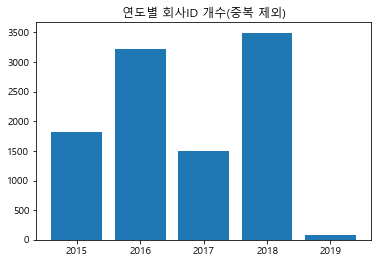

In [136]:
# 연도별 회사ID 개수 추출 및 시각화

x = []
y = []

for k, v in df_v2.groupby("년도")["회사ID"]:
    v = v. unique()  # 회사ID 중복 제외
    count = len(v)  # 회사ID 개수 정보 저장
    x.append(k)  # 해당 연도 정보 list에 추가
    y.append(count)  # 연도별 회사 개수 정보 list에 추가
    print(f"{k}년 : 총 {count}개 회사 (세부내역 : {v})")

plt.bar(x, y)
plt.title("연도별 회사ID 개수(중복 제외)")
plt.show()

In [137]:
# 시작시점 및 종료시점 기준 회사ID 개수 세부 파악(1차) => 1~2년 내의 단기적인 data만 있는 회사ID개수가 상당히 많은 것으로 나타남

#df_info["Start_date"].value_counts()  # 시작시점 기준 개수
#df_info["End_date"].value_counts()  # 종료시점 기준 개수
df_info.value_counts().head(20)  # 시작시점 및 종료시점 조합에 따른 개수

Start_date  End_date  
2018-01-01  2018-12-01    1180
2015-11-01  2018-12-01    1154
2016-01-01  2018-12-01     734
            2016-12-01     620
2015-11-01  2016-12-01     239
            2015-12-01     199
2016-01-01  2017-12-01     134
2015-11-01  2017-12-01     121
2018-02-01  2018-12-01      46
2015-11-01  2019-12-01      30
2018-11-01  2018-12-01      28
2018-05-01  2018-12-01      26
2015-12-01  2017-12-01      26
2018-04-01  2018-12-01      26
2018-06-01  2018-12-01      25
2018-07-01  2018-12-01      19
2018-09-01  2018-12-01      19
2018-08-01  2018-12-01      18
2016-02-01  2016-12-01      18
2018-03-01  2018-12-01      17
dtype: int64

In [138]:
# 시작시점 및 종료시점 기준 회사ID 개수 세부 파악(2차) => 각 시점별 세부내역 현황 확인

#df_info[df_info["End_date"] >= "2019-01-01"].value_counts()  # 종료시점이 2019년 1월이후인 내역 정보 확인
#df_info[df_info["End_date"] <= "2018-12-01"].value_counts()  # 종료시점이 2018년 12월 이전인 내역 정보 확인
df_info[df_info["Start_date"] <= "2016-01-01"].value_counts()  # 시작시점이 2016년 1월 이전인 내역 정보 확인

Start_date  End_date  
2015-11-01  2018-12-01    1154
2016-01-01  2018-12-01     734
            2016-12-01     620
2015-11-01  2016-12-01     239
            2015-12-01     199
2016-01-01  2017-12-01     134
2015-11-01  2017-12-01     121
            2019-12-01      30
2015-12-01  2017-12-01      26
            2018-12-01      14
2016-01-01  2019-12-01      14
2015-12-01  2016-12-01      13
            2015-12-01      11
2016-01-01  2016-05-01       3
            2016-04-01       3
            2016-11-01       2
            2016-02-01       2
            2016-09-01       2
2015-11-01  2018-08-01       2
            2018-11-01       2
            2016-11-01       2
2016-01-01  2016-03-01       2
            2017-09-01       1
            2017-10-01       1
            2017-11-01       1
2015-11-01  2017-10-01       1
            2016-07-01       1
2016-01-01  2018-02-01       1
            2017-04-01       1
            2018-04-01       1
            2018-07-01       1
            2018

### 유니콘 기업인지 여부를 판단하기 위한 최소한의 기간 설정
* 최소기간 설정 => 3년
 - 시작시점 : 2016년 1월 이전
 - 종료시점 : 2018년 12월 이후<br/>
    ※ 최근 시점인 2019년의 경우 data가 유독 적은 이유에 대한 확인이 필요하나, 여기서는 각 회사의 실제 유지여부와 상관없이 2019년 data내역들이 제대로 추출되지 않은 것으로 가정함
* 판단 근거
 - 연매출액 등 지표에 대한 의미있는 변화 추이 파악을 위해 최소 3개년도에 걸친 data 필요
 - 최근 중소벤처기업부에서 선정한 거대신생기업(60개사)의 평균 업력이 3.7년인 점 함께 고려<br/>
 (참조 : https://www.mss.go.kr/site/smba/ex/bbs/View.do?cbIdx=86&bcIdx=1026739)

### 위 기간에 해당하는 회사ID 추출

In [169]:
# 시작시점(2016년 1월 이전) 및 종료시점(2018년 12월 이후) 기준 해당 회사ID 추출
df_cand = df_info[df_info["End_date"] >= "2018-12-01"]
df_cand = df_cand[df_cand["Start_date"] <= "2016-01-01"]
df_cand.value_counts()  # 기간별 분포 확인

Start_date  End_date  
2015-11-01  2018-12-01    1154
2016-01-01  2018-12-01     734
2015-11-01  2019-12-01      30
2015-12-01  2018-12-01      14
2016-01-01  2019-12-01      14
dtype: int64

In [170]:
len(df_cand.index)  # 추출된 회사ID 개수 확인

1946

In [174]:
df_cand.sort_index()  # 인덱스 기준 오름차순 정렬
df_cand

,Start_date,End_date
14271,2015-11-01,2019-12-01
44851,2016-01-01,2018-12-01
59533,2015-11-01,2018-12-01
122968,2015-11-01,2018-12-01
123082,2016-01-01,2018-12-01
...,...,...
513441,2016-01-01,2018-12-01
514152,2015-11-01,2018-12-01
514934,2016-01-01,2018-12-01
515264,2016-01-01,2018-12-01


### 추출된 회사ID에 해당되지 않는 행 삭제한 신규 데이터프레임 생성(df_v3)

In [188]:
# 데이터프레임에서 삭제할 행 index 정보 추출
df_v3 = df_v2
drop_index = []

for i in df_v3.index[:]:
    v = df_v3.iloc[i]["회사ID"]
    if v in df_cand.index:
        continue
    else:
        drop_index.append(i)

[2, 5, 6, 10, 11, 14, 18, 21, 25, 26]

In [189]:
drop_index[:20]

[2, 5, 6, 10, 11, 14, 18, 21, 25, 26, 27, 28, 32, 34, 37, 42, 48, 49, 51, 53]

In [190]:
# 해당 행 삭제 진행 => 기존 99801행에서 62457행으로 줄어든 것을 확인
for v in drop_index:
    df_v3.drop(v, axis=0, inplace=True)

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,인당_연금보험료(평균),연월일,Start_date,End_date
0,233757,41688077,2018,7,8912380,36,247566,2018-07-01,2015-11-01,2018-12-01
1,123464,1760695,2018,3,942380,5,188476,2018-03-01,2016-01-01,2018-12-01
3,386420,4815584,2015,11,3795900,14,271135,2015-11-01,2015-11-01,2018-12-01
4,129243,9799736,2018,10,40724680,151,269699,2018-10-01,2015-11-01,2018-12-01
7,189562,7119908,2016,1,1276900,6,212816,2016-01-01,2015-11-01,2018-12-01
...,...,...,...,...,...,...,...,...,...,...
99794,466886,119791,2018,2,336220,4,84055,2018-02-01,2016-01-01,2018-12-01
99795,150135,7119441,2016,12,4872520,25,194900,2016-12-01,2016-01-01,2018-12-01
99796,171439,4630622,2017,2,2402740,11,218430,2017-02-01,2015-11-01,2018-12-01
99799,362194,2100218,2018,12,874780,3,291593,2018-12-01,2015-11-01,2018-12-01


In [191]:
df_v3

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,인당_연금보험료(평균),연월일,Start_date,End_date
0,233757,41688077,2018,7,8912380,36,247566,2018-07-01,2015-11-01,2018-12-01
1,123464,1760695,2018,3,942380,5,188476,2018-03-01,2016-01-01,2018-12-01
3,386420,4815584,2015,11,3795900,14,271135,2015-11-01,2015-11-01,2018-12-01
4,129243,9799736,2018,10,40724680,151,269699,2018-10-01,2015-11-01,2018-12-01
7,189562,7119908,2016,1,1276900,6,212816,2016-01-01,2015-11-01,2018-12-01
...,...,...,...,...,...,...,...,...,...,...
99794,466886,119791,2018,2,336220,4,84055,2018-02-01,2016-01-01,2018-12-01
99795,150135,7119441,2016,12,4872520,25,194900,2016-12-01,2016-01-01,2018-12-01
99796,171439,4630622,2017,2,2402740,11,218430,2017-02-01,2015-11-01,2018-12-01
99799,362194,2100218,2018,12,874780,3,291593,2018-12-01,2015-11-01,2018-12-01


# 연매출액 추이에 대한 회사ID별 분석

In [229]:
# 연도별 연매출액 추이 시각화 함수 정의
def show_sales(id_num):
    infos = 0
    for k, v in df_v3.groupby("회사ID"):
        if k == id_num:
            infos = v
            
    start_year = infos["Start_date"].tolist()[0].year
    end_year = infos["End_date"].tolist()[0].year
    
    x = [x for x in range(start_year, end_year + 1)]
    y = []
    
    for year_v in range(start_year, end_year + 1):
        year_sales = infos[infos["년도"] == year_v]["연매출액"].tolist()[0]
        y.append(year_sales)

    plt.bar(x, y)
    plt.title(f"연도별 연매출액 추이(회사ID : {id_num})")
    plt.show()

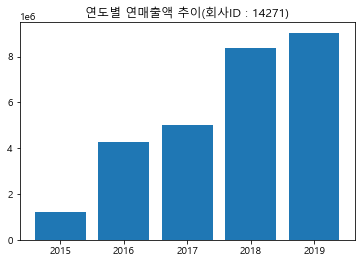

In [232]:
show_sales(14271)